# Preamble:

CS390Z - Introduction to Data Mining - Fall 2021

Instructor: Thyago Mota

Description: Program 02

Author: Brandon Young

Description: This program is meant to demonstrate a method of creating classification models to predict the genre of a song baseed on given data.

# Introduction:

In this program, I intend to use the data provided from Kaggle in order to predict a song's genre using three different classification models; specifically, the goal is to use a decision tree, Bayes Classification, and ANN.

# Dataset:

The dataset in this instance is a CSV file that has been collected from Kaggle showing a list of songs and their genre. The CSV file consists of 42,305 songs with different genres and displays multiple attributes quantified in numbers. Among these are danceabiliyt, energy, key, loudness, speechiness, acousticness, instramentalness, liveness, valence, tempo, and duration_ms. There are other bits of information such as the ID, song name, and other unique identifiers.

# Preprocessing:

In [19]:
from bs4 import BeautifulSoup
import pandas as pd
import csv, os, math, sys, re, random
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB


DATA_FOLDER = '../data'
CSV_FILE_NAME = 'C:/Users/brand/Documents/HW Folder/Data Mining/prg02_songs_classifier/data/genres_v2.csv'

csv_reader = csv.reader(CSV_FILE_NAME)
df = pd.read_table(CSV_FILE_NAME, delimiter = ",")
random.seed(0)


print(CSV_FILE_NAME)
print(df.head())

C:/Users/brand/Documents/HW Folder/Data Mining/prg02_songs_classifier/data/genres_v2.csv
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                 

c:\users\brand\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


This section is used to import the resources needed to read the CSV files as well as prepare for the use of the decision tree and other functions.

In [20]:
dataset = pd.read_csv(CSV_FILE_NAME, low_memory=False)
dataset.shape
# This should show the shape of the rows and columns
dataset.head()

X = dataset.drop(['Unnamed: 0', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'title', 'genre'], axis=1)

#Dropping several columns that aren't useful here

y = dataset['genre']

For the dataset, what we aim to do is drop all of the columns that don't allow us to predict any sort of data. This includes the empty columns and columns such as song names and so on.

We intentionally set the y value to be genre as this is what we want to predict in this case.

# Summary Statistics:

<function matplotlib.pyplot.show(close=None, block=None)>

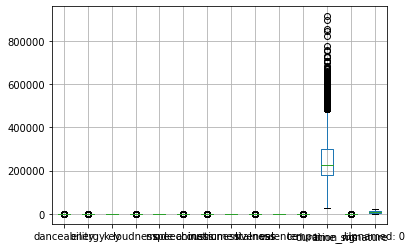

In [11]:
dataset.
plt.show

# Classification Models:

Decision Tree Inference:

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(y_predict)

[[350  23  63   4  37  29 115 148   9  12  14  16  10  46  30]
 [ 16 161  18  12   8  28  13  18   7   9   1   1   0  14   6]
 [ 59  36 172  11  71  90  18 135   8   1   0   2   0   4  11]
 [  7  21  13  10   6  13   5   5   1   0   0   3   0   0   1]
 [ 29   2  54   3 148  23  12  96   0   0   0   0   0   3   4]
 [ 28  31  93  13  37 122  11  52   1   0   0   2   1   2   5]
 [105  16  15   1  13   7  73 115   2   7   1   2   0   8   9]
 [266  13 198  18 149  77 144 326   3   2   0   2   3   3  11]
 [ 11   7   2   0   1   3   1   2 554   1   0   0   0   0   1]
 [ 13  14   2   0   2   2   4   3   0 515   7   0   0   1  35]
 [  5   1   0   0   0   1   2   0   0   6 516   0  31  24   6]
 [ 10   3   4   5   3   4   2   2   0   0   0 525  60   7   0]
 [ 16   1   0   0   0   1   0   1   0   0  18  50 487  27   0]
 [ 40   3   3   3   2   3   5   3   1   2  34   7  41 429   5]
 [ 33   3   6   0   3   4  13   4   0  46   5   2   0   5 475]]
                 precision    recall  f1-score   suppo

Bayes Classification:

In [13]:
rows_train = random.sample(range(len(dataset)),k=int(len(dataset)*.2))

df_train = pd.DataFrame(columns = dataset.columns)
df_test = pd.DataFrame(columns = dataset.columns)
for i, row dataset.iterrows():
    df_train = dftrain.append(row)
else:
    df_test = df_test.append(row)

IndentationError: unexpected indent (Temp/ipykernel_26364/2611342337.py, line 5)

ANN: